In [6]:
!pip install opencv-python

In [7]:
import os

In [8]:
print(os.getcwd())

/content


In [9]:
file_path = './cat_or_dog_2.jpg'
print(os.path.exists(file_path))

True


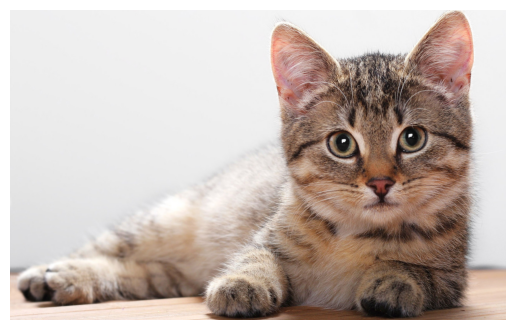

In [10]:
import os, json, cv2, random
import matplotlib.pyplot as plt
img = cv2.imread('./cat_or_dog_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()


In [11]:
img

array([[[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       ...,

       [[240, 223, 215],
        [240, 223, 215],
        [239, 222, 214],
        ...,
        [215, 183, 162],
        [215, 183, 162],
        [215, 183, 162]],

       [[241, 224, 216],
        [240, 223, 215],
        [240, 223, 215],
        ...,
        [218, 183, 164],
        [218, 183, 164],
        [219, 184, 165]],

       [[240, 223, 215],
        [239, 222, 214],
        [238, 221, 213],
        ...,
        [221, 186, 167],
        [221, 186, 167],
        [221, 186, 167]]

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
from tensorflow.keras.initializers import glorot_uniform, HeNormal, Zeros, RandomNormal
from tensorflow.keras.datasets import mnist



In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,784)/255
x_test = x_test.reshape(-1,784)/255
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
def create_network(initializers):
  model = Sequential()
  model.add(Dense(256, kernel_initializer=initializers, input_shape=(784,)))
  model.add(Activation('relu'))
  model.add(Dense(128, kernel_initializer=initializers))
  model.add(Activation('relu'))
  model.add(Dense(10, kernel_initializer=initializers))
  model.add(Activation('softmax'))
  return model


In [15]:
zeros_initializer = Zeros()
he_initializer = HeNormal()
random_initializer = RandomNormal(mean=0.0, stddev=0.01, seed=None)
xavier_initializer = glorot_uniform(seed=None)

In [16]:
initializers = [zeros_initializer, he_initializer, random_initializer, xavier_initializer]

In [17]:
for initializer in initializers:
  model = create_network(initializer)
  model.compile(loss='categorical_crossentropy', optimizer= SGD(learning_rate=0.01), metrics=['accuracy'])
  model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
  print(f'\nModel with {initializer} initialization:')
  print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1128 - loss: 2.3018 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.1117 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1128 - loss: 2.3011 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1109 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1102 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1132 - loss: 2.3008 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1124 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.1098 - loss: 2.30